In [1]:
def mount_and_change_woriking_dir():
    from google.colab import drive
    drive.mount('/content/drive')

    # map google drive and go to ur project directory.
    import os
    project_path = "/content/drive/MyDrive/Colab Notebooks/MyPracticeProjects"
    os.chdir(project_path)
    print("CWD : ", os.getcwd())
    print("Files : ", os.listdir())

https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

https://www.kaggle.com/rounakbanik/the-movies-dataset

https://en.wikipedia.org/wiki/List_of_American_films_of_2018

https://en.wikipedia.org/wiki/List_of_American_films_of_2019

https://en.wikipedia.org/wiki/List_of_American_films_of_2020

In [5]:
!cp datasets/datasets/movie_metadata.csv datasets/MovieRecommendationSystem/


In [6]:
!ls datasets/MovieRecommendationSystem/

credits.csv  data.csv  movie_metadata.csv  movies_metadata.csv


## **Preprocessing - part 1**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df_metadata = pd.read_csv('datasets/MovieRecommendationSystem/movie_metadata.csv')
df_metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
print("shape : ", df_metadata.shape)
df_metadata.columns

shape :  (5043, 28)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
len(df_metadata.title_year.unique()), df_metadata.title_year.unique()

(92, array([2009., 2007., 2015., 2012.,   nan, 2010., 2016., 2006., 2008.,
        2013., 2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003.,
        2001., 2002., 1998., 2000., 1990., 1991., 1994., 1996., 1982.,
        1993., 1979., 1992., 1989., 1984., 1988., 1978., 1962., 1980.,
        1972., 1981., 1968., 1985., 1940., 1963., 1987., 1986., 1973.,
        1983., 1976., 1977., 1970., 1971., 1969., 1960., 1965., 1964.,
        1927., 1974., 1937., 1975., 1967., 1951., 1961., 1946., 1953.,
        1954., 1959., 1932., 1947., 1956., 1945., 1952., 1930., 1966.,
        1939., 1950., 1948., 1958., 1957., 1943., 1944., 1938., 1949.,
        1936., 1941., 1955., 1942., 1929., 1935., 1933., 1916., 1934.,
        1925., 1920.]))

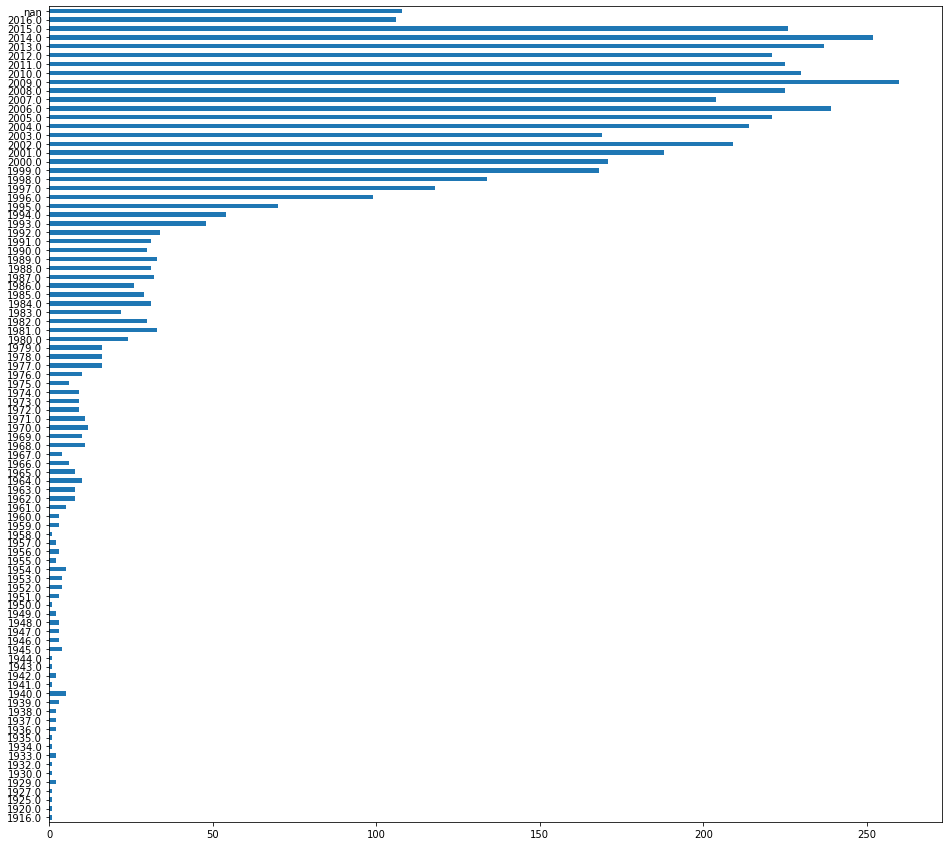

In [11]:
_=df_metadata.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(16,15))
# plt.figure(figsize=(20,20))
# _=sns.countplot(data=df_metadata, y='title_year', order=df_metadata.title_year.value_counts().sort_index(ascending=False).index)

In [12]:
# df_metadata.columns
cols = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'movie_title']

In [13]:
df_metadata = df_metadata.loc[:, cols]
df_metadata.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [14]:
df_metadata.info()
print("check null values".center(50,"#"))
print(df_metadata.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  4939 non-null   object
 1   actor_1_name   5036 non-null   object
 2   actor_2_name   5030 non-null   object
 3   actor_3_name   5020 non-null   object
 4   genres         5043 non-null   object
 5   movie_title    5043 non-null   object
dtypes: object(6)
memory usage: 236.5+ KB
################check null values#################
director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64


In [15]:
# impute nan values
df_metadata['actor_1_name'] = df_metadata['actor_1_name'].replace(np.nan, 'unknown')
df_metadata['actor_2_name'] = df_metadata['actor_2_name'].replace(np.nan, 'unknown')
df_metadata['actor_3_name'] = df_metadata['actor_3_name'].replace(np.nan, 'unknown')
df_metadata['director_name'] = df_metadata['director_name'].replace(np.nan, 'unknown')

print("check null values".center(50,"#"))
print(df_metadata.isnull().sum())

################check null values#################
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64


In [16]:
# get genere names
df_metadata['genres'] = df_metadata['genres'].str.replace("|", " ")
df_metadata['movie_title'] = df_metadata['movie_title'].str.lower()

df_metadata['movie_title'][0], df_metadata['genres'][0]

('avatar\xa0', 'Action Adventure Fantasy Sci-Fi')

In [17]:
# remove all the un-necessary character at the end of title
df_metadata['movie_title'] = df_metadata['movie_title'].apply(lambda x: x[:-1])
df_metadata['movie_title'][0]

'avatar'

In [18]:
# save the processed data
df_metadata.to_csv('datasets/MovieRecommendationSystem/data.csv', index=False)
!ls datasets/MovieRecommendationSystem/ -lrt

total 221024
-rw------- 1 root root 189917659 Dec  6 03:55 credits.csv
-rw------- 1 root root  34445126 Dec  6 03:57 movies_metadata.csv
-rw------- 1 root root   1489644 Dec  6 06:02 movie_metadata.csv
-rw------- 1 root root    475464 Dec  6 06:02 data.csv


## **Preprocessing -- part 2**


In [19]:
import pandas as pd
import numpy as np
import ast

In [20]:
# copy the credits.csv file to dataset folder.
!cp datasets/datasets/movies_metadata.csv datasets/MovieRecommendationSystem/
!ls datasets/MovieRecommendationSystem
# !ls datasets/datasets/

credits.csv  data.csv  movie_metadata.csv  movies_metadata.csv


In [21]:
credits = pd.read_csv("datasets/MovieRecommendationSystem/credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [22]:
meta = pd.read_csv("datasets/MovieRecommendationSystem/movies_metadata.csv")
meta.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [23]:
pd.DataFrame(meta.dtypes, columns=["Type"]).T

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
Type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,object,object,object,object,float64,float64


In [24]:
# change the dtype of release data column to datatime
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['release_date'].dt.year

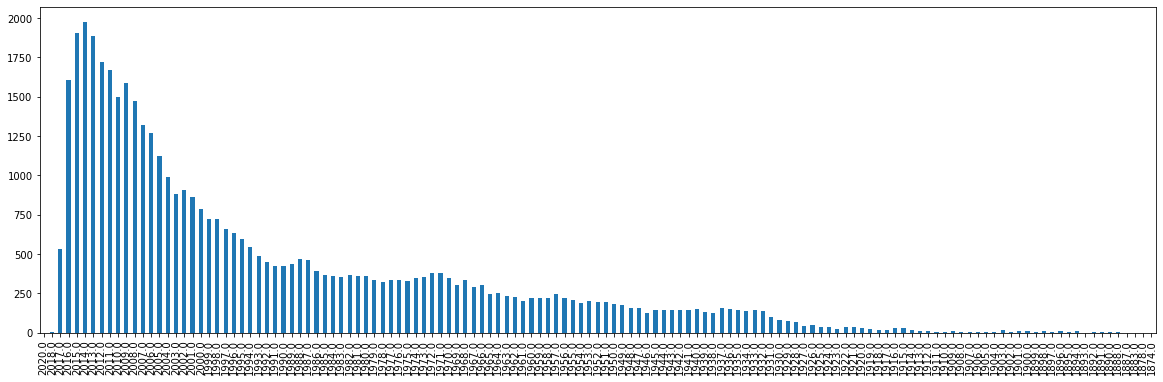

In [25]:
_ = meta['year'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(20,6))

In [26]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file.
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [27]:
new_meta['id'] = new_meta['id'].astype(int)

In [28]:
pd.set_option('display.max_colwidth', 75)
data = pd.merge(credits, new_meta, on='id')
print(data.shape)
data.head()

(531, 6)


,cast,crew,id,genres,title,year
0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ...",166426,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
1,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ...",141052,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",Justice League,2017.0
2,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge...",284053,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",Thor: Ragnarok,2017.0
3,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend...",283995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",Guardians of the Galaxy Vol. 2,2017.0
4,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '...",245842,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",The King's Daughter,2017.0


In [29]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [30]:
# space separated string of genres
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))                

In [31]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

print("Genres List".center(50,'#'))
print(data['genres_list'].head())
print("Actor 1".center(50,'#'))
print(data['actor_1_name'].head())
print("Actor 2".center(50,'#'))
print(data['actor_2_name'].head())
print("Actor 3".center(50,'#'))
print(data['actor_3_name'].head())
print("Director 1".center(50,'#'))
print(data['director_name'].head())

###################Genres List####################
0    Adventure Action Fantasy Comedy
1    Action Adventure Fantasy Sci-Fi
2    Action Adventure Fantasy Sci-Fi
3     Action Adventure Comedy Sci-Fi
4           Fantasy Action Adventure
Name: genres_list, dtype: object
#####################Actor 1######################
0        Johnny Depp
1        Ben Affleck
2    Chris Hemsworth
3        Chris Pratt
4     Pierce Brosnan
Name: actor_1_name, dtype: object
#####################Actor 2######################
0     Javier Bardem
1      Henry Cavill
2    Tom Hiddleston
3       Zoe Saldana
4      William Hurt
Name: actor_2_name, dtype: object
#####################Actor 3######################
0      Geoffrey Rush
1          Gal Gadot
2     Cate Blanchett
3      Dave Bautista
4    Benjamin Walker
Name: actor_3_name, dtype: object
####################Director 1####################
0    Joachim Rønning Espen Sandberg
1                       Zack Snyder
2                     Taika Waititi
3      

In [32]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [33]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [34]:
movie = movie.dropna(how='any')
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [35]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})
movie['movie_title'] = movie['movie_title'].str.lower()
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...


In [37]:
old = pd.read_csv('datasets/MovieRecommendationSystem/data.csv')
old.head(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens


In [38]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old.head(3)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...


In [39]:
new = old.append(movie)
new.shape

(5501, 7)

In [40]:
new.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [41]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new.shape

(5364, 7)

In [1]:
new.to_csv('datasets/MovieRecommendationSystem/new_data.csv',index=False)

ls: cannot access 'datasets/MovieRecommendationSystem/': No such file or directory


## **Preprocessing -- part 3**

In [2]:
mount_and_change_woriking_dir()
!ls datasets/MovieRecommendationSystem/ -lrt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CWD :  /content/drive/MyDrive/Colab Notebooks/MyPracticeProjects
Files :  ['css', 'setup.sh', 'utility.py', '__pycache__', 'datasets', '.ipynb_checkpoints', 'saved_models', 'CarPricePrediction.py', 'app.py']
total 221922
-rw------- 1 root root 189917659 Dec  6 03:55 credits.csv
-rw------- 1 root root   1489644 Dec  6 06:03 movie_metadata.csv
-rw------- 1 root root    475464 Dec  6 06:03 data.csv
-rw------- 1 root root  34445126 Dec  6 06:03 movies_metadata.csv
-rw------- 1 root root    919333 Dec  6 06:14 new_data.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [5]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
print(df.shape)
df.head()

(267, 6)


,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6]


In [6]:
!pip install tmdbv3api

In [7]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '372d27dc5adf49b680f074659a3c6d9a'

In [16]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    # print("result :", result)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    # print("data_json : ", data_json['genres'])
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [18]:
# print(df['Title'][:1][0])
# print("#"*50)
# df['Title'][:1].map(lambda x: get_genre(str(x)))
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [19]:
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],Action Thriller


In [20]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018.head()

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller


In [25]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])


def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


df_2018 = df_2018.rename(columns={'Title':'movie_title'})
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df18.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter


In [26]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...


In [27]:

link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[3]
df2 = pd.read_html(link, header=0)[4]
df3 = pd.read_html(link, header=0)[5]
df4 = pd.read_html(link, header=0)[6]

df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,JANUARY,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]


In [28]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df_2019 = df[['Title','Cast and crew','genres']]
df_2019.head()

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Thriller Action Mystery Adventure Horror
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama


In [29]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

df_2019 = df_2019.rename(columns={'Title':'movie_title'})
df_2019.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Thriller Action Mystery Adventure Horror,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman


In [30]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

new_df19['movie_title'] = new_df19['movie_title'].str.lower()
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']
new_df19.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Adventure Horror,escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil B...


In [31]:
my_df = new_df18.append(new_df19,ignore_index=True)
my_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...


In [33]:
old_df = pd.read_csv('datasets/MovieRecommendationSystem/new_data.csv')
old_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [46]:
final_df = old_df.append(my_df,ignore_index=True)
final_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [47]:
print(" Before ".center(50,"#"))
print(final_df.isna().sum())

final_df = final_df.dropna(how='any')

print(" After ".center(50,"#"))
print(final_df.isna().sum())

final_df.to_csv('datasets/MovieRecommendationSystem/final_data.csv',index=False)

!ls -lrt datasets/MovieRecommendationSystem/

##################### Before #####################
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           5
movie_title      0
comb             5
dtype: int64
##################### After ######################
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64
total 222908
-rw------- 1 root root 189917659 Dec  6 03:55 credits.csv
-rw------- 1 root root   1489644 Dec  6 06:03 movie_metadata.csv
-rw------- 1 root root    475464 Dec  6 06:03 data.csv
-rw------- 1 root root  34445126 Dec  6 06:03 movies_metadata.csv
-rw------- 1 root root    919333 Dec  6 06:14 new_data.csv
-rw------- 1 root root   1009455 Dec  6 13:24 final_data.csv


## **Preprocesing -- part 4**

In [48]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

In [49]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

tables = soup.find_all('table',class_='wikitable sortable')

len(tables), type(tables[0])

In [50]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2]
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3]
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4]
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5]


In [51]:
df_2020 = df[['Title','Cast and crew']]
df_2020.head()

,Title,Cast and crew
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...
1,Underwater,"William Eubank (director); Brian Duffield, Ada..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...


In [52]:
!pip install tmdbv3api

In [53]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '372d27dc5adf49b680f074659a3c6d9a'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))
df_2020.head()

In [76]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

df_2020.loc[:,'director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))
df_2020.loc[:,'actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))
df_2020.loc[:,'actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))
df_2020.loc[:,'actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

df_2020 = df_2020.rename(columns={'Title':'movie_title'})
df_2020.head()

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Drama Thriller Crime,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs


In [57]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']
new_df20['movie_title'] = new_df20['movie_title'].str.lower()
new_df20.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon...
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...


In [58]:
print(" Before ".center(50,"#"))
print(new_df20.isna().sum())

new_df20 = new_df20.dropna(how='any')

print(" After ".center(50,"#"))
print(new_df20.isna().sum())

##################### Before #####################
director_name     0
actor_1_name      0
actor_2_name      2
actor_3_name     24
genres            1
movie_title       0
comb             25
dtype: int64
##################### After ######################
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64


In [59]:
old_df = pd.read_csv('datasets/MovieRecommendationSystem/final_data.csv')
final_df = old_df.append(new_df20,ignore_index=True)
final_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [60]:
final_df.to_csv('datasets/MovieRecommendationSystem/main_data.csv',index=False)

!ls -ltr datasets/MovieRecommendationSystem/

total 223934
-rw------- 1 root root 189917659 Dec  6 03:55 credits.csv
-rw------- 1 root root   1489644 Dec  6 06:03 movie_metadata.csv
-rw------- 1 root root    475464 Dec  6 06:03 data.csv
-rw------- 1 root root  34445126 Dec  6 06:03 movies_metadata.csv
-rw------- 1 root root    919333 Dec  6 06:14 new_data.csv
-rw------- 1 root root   1009455 Dec  6 13:24 final_data.csv
-rw------- 1 root root   1049780 Dec  6 13:47 main_data.csv


## **Sentiment analysis**

In [61]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [62]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
!cp datasets/datasets/reviews.txt datasets/MovieRecommendationSystem/ -rf
!ls -lrt datasets/MovieRecommendationSystem/

total 224371
-rw------- 1 root root 189917659 Dec  6 03:55 credits.csv
-rw------- 1 root root   1489644 Dec  6 06:03 movie_metadata.csv
-rw------- 1 root root    475464 Dec  6 06:03 data.csv
-rw------- 1 root root  34445126 Dec  6 06:03 movies_metadata.csv
-rw------- 1 root root    919333 Dec  6 06:14 new_data.csv
-rw------- 1 root root   1009455 Dec  6 13:24 final_data.csv
-rw------- 1 root root   1049780 Dec  6 13:47 main_data.csv
-rw------- 1 root root    447540 Dec  6 13:53 reviews.txt


In [69]:
dataset = pd.read_csv('datasets/MovieRecommendationSystem/reviews.txt',sep = '\t', names =['Reviews','Comments'])
dataset.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [70]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf = True, lowercase = True, 
                             strip_accents='ascii',stop_words=stopset)

X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

print("Accuracy : ", accuracy_score(y_test,clf.predict(X_test))*100)

clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

print("Accuracy : ", accuracy_score(y_test,clf.predict(X_test))*100)

Accuracy :  97.47109826589595
Accuracy :  98.77167630057804


In [74]:
pickle.dump(vectorizer, open('saved_models/tranform.pkl', 'wb'))

filename = 'saved_models/nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))